In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import scipy

###reading data
missing_value=['?']
data = pd.read_csv("data/eye-tracking and others.csv",na_values=missing_value, delimiter=",")

# print(data.isnull().sum())
print(data.shape)
##removing missing values
data.dropna(inplace=True)
#16 row removed.
print(data.shape)
# data
# CDT culomn is eliminated because this culomn is empty.

(120, 62)
(104, 62)


In [20]:
data1, data3 = data.copy(), data.copy()
data1["group"] = np.array([1 if yins ==2 else 0 if yins == 1 else np.nan for yins in data1.values[:,0]])
data3["group"] = np.array([1 if yins ==3 else 0 if yins == 1 else np.nan for yins in data3.values[:,0]])
data1.dropna(inplace=True)
data3.dropna(inplace=True)


# X=data1.iloc[:,1:]
# y=data1.iloc[:,0]

# X = X.astype(np.float64)
# y = y.astype(np.float64)

X=data3.iloc[:,1:]
y=data3.iloc[:,0]
X.shape

(68, 61)

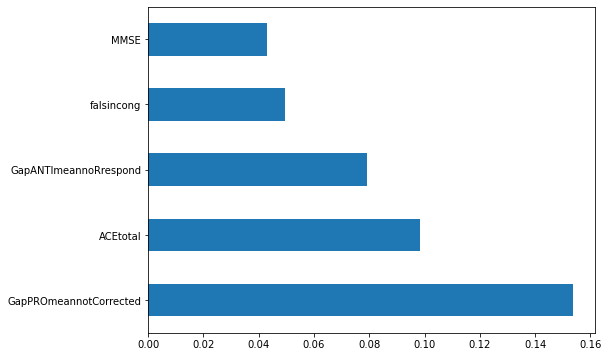

20

In [22]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
feat_importances = pd.DataFrame(feat_importances.nlargest(20))
len(feat_importances.index)


In [23]:
# print(scipy.stats.entropy(X['OverlapPROmeanAcuracy']))
# X.columns
# for f in X.columns:
#     print(f, scipy.stats.entropy(X[f]))
    

Best alpha using built-in LassoCV: 0.220384
Best score using built-in LassoCV: 0.925898
Lasso picked 20 variables and eliminated the other 41 variables


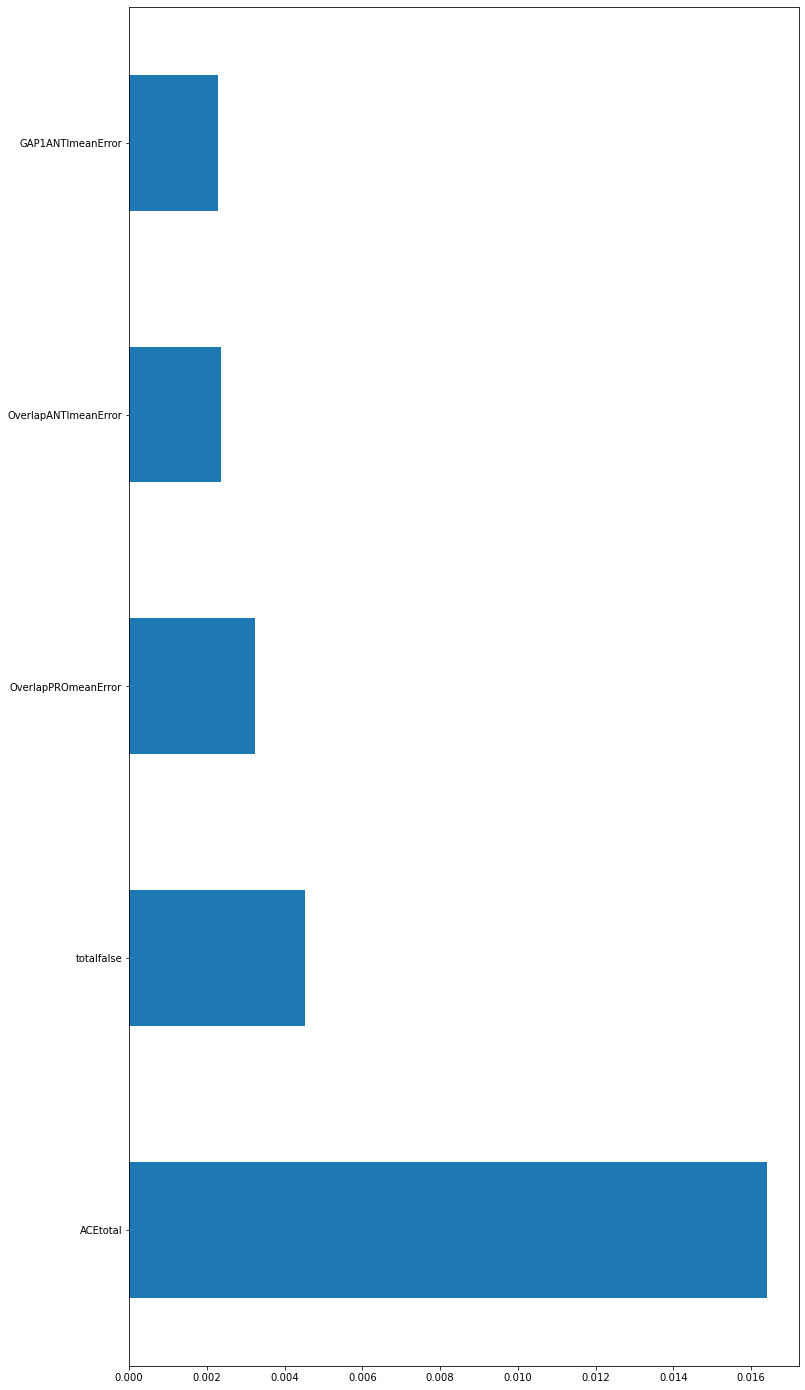

['ACEtotal',
 'totalfalse',
 'OverlapPROmeanError',
 'OverlapANTImeanError',
 'GAP1ANTImeanError']

In [26]:
#LassoCV
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef1 = np.abs(coef)
feat_importances = pd.Series(coef1, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
list(feat_importances.nlargest(5).index)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

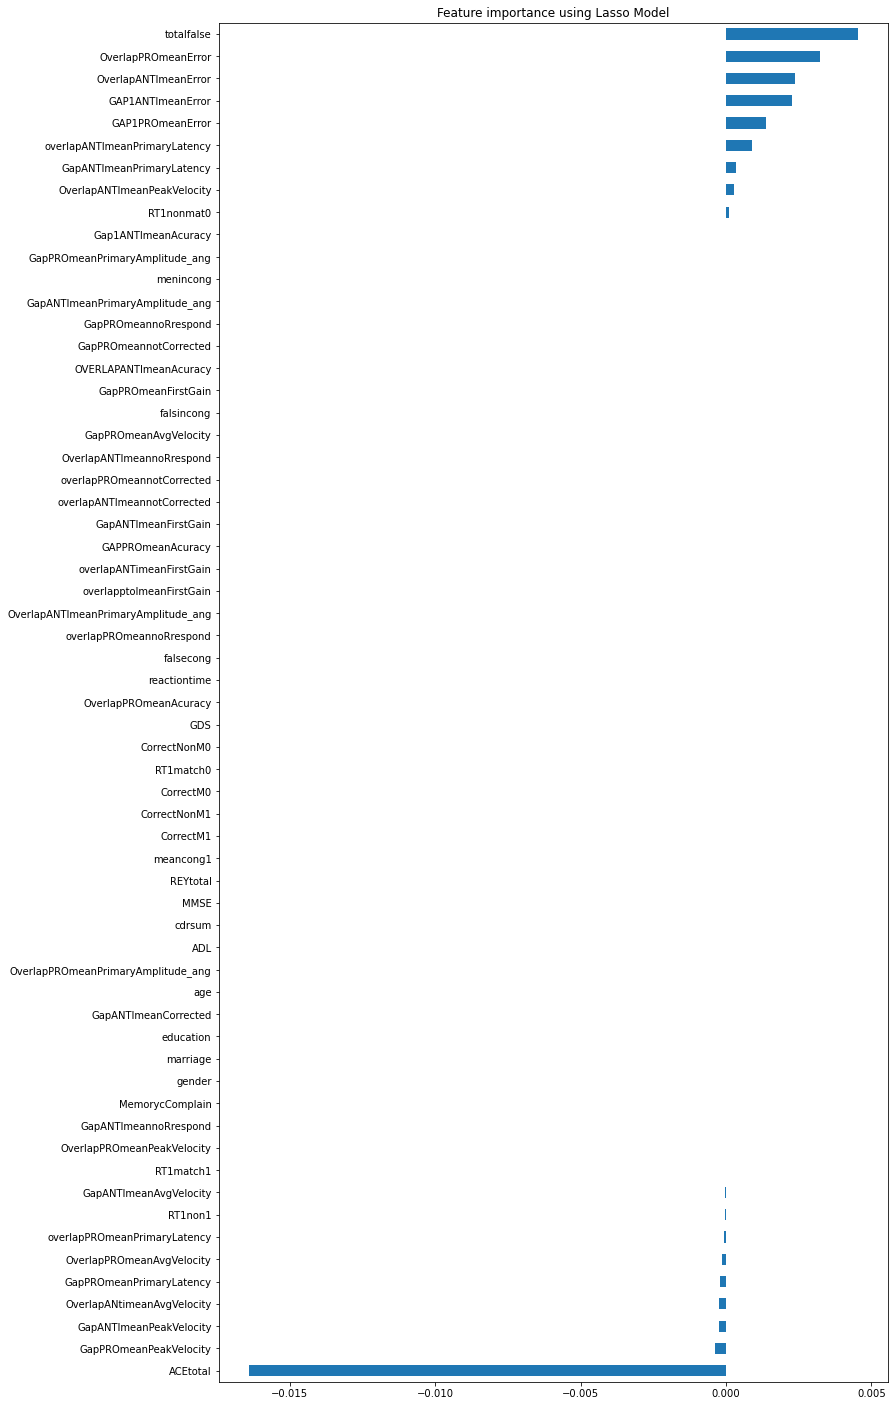

In [27]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 25.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

 Removing features with low variance


In [28]:
# from sklearn.feature_selection import VarianceThreshold
# # X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# z = sel.fit_transform(X)
# z = pd.DataFrame(z)
# z

Univariate feature selection

In [29]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X.shape)

X_new = SelectKBest(chi2).fit_transform(X, y)
print(X_new.shape)
selectedfeature = ['OverlapPROmeanAvgVelocity','GAP1PROmeanError','OverlapPROmeanPeakVelocity',
                             'OverlapANTImeanPeakVelocity','OverlapPROmeanError','GapPROmeanPeakVelocity',
                             'GapANTImeanAvgVelocity','OverlapANTImeanError','GapANTImeanPeakVelocity','totalfalse']
print(selectedfeature)
pd.DataFrame(X_new, columns=selectedfeature)


(68, 61)
(68, 10)
['OverlapPROmeanAvgVelocity', 'GAP1PROmeanError', 'OverlapPROmeanPeakVelocity', 'OverlapANTImeanPeakVelocity', 'OverlapPROmeanError', 'GapPROmeanPeakVelocity', 'GapANTImeanAvgVelocity', 'OverlapANTImeanError', 'GapANTImeanPeakVelocity', 'totalfalse']


,OverlapPROmeanAvgVelocity,GAP1PROmeanError,OverlapPROmeanPeakVelocity,OverlapANTImeanPeakVelocity,OverlapPROmeanError,GapPROmeanPeakVelocity,GapANTImeanAvgVelocity,OverlapANTImeanError,GapANTImeanPeakVelocity,totalfalse
0,535.00,535.00,405.93,535.00,2.02,21.76,160.20,160.04,549.0,7.0
1,0.05,0.10,304.23,0.03,0.00,0.02,153.01,68.03,310.0,4.0
2,388.05,0.10,302.10,0.03,8.70,134.01,160.02,160.08,668.0,6.0
3,0.08,0.15,337.68,0.15,0.00,35.01,160.01,0.01,690.0,4.0
4,0.03,0.05,374.53,0.09,12.50,134.01,160.01,160.01,1042.0,4.0
...,...,...,...,...,...,...,...,...,...,...
63,51.85,151.58,495.82,77.69,15.15,0.02,0.01,0.02,714.0,25.0
64,0.24,153.59,448.59,0.25,16.67,55.00,35.00,15.00,732.0,14.0
65,0.03,0.07,552.99,0.02,30.91,0.20,0.06,0.18,837.0,25.0
66,0.11,330.24,473.00,90.03,20.83,0.13,0.03,0.14,758.0,25.0


L1-based feature selection

In [30]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel


# X.shape

# lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# X_new.shape


Tree-based feature selection

In [31]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# print(X.shape)

# clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X, y)
# print(clf.feature_importances_)  

# model = SelectFromModel(clf, prefit=True)
# X_new = model.transform(X)
# X_new.shape               


In [32]:
# y = list(y)
X.shape

(68, 61)

In [34]:
X = X[list(feat_importances.nlargest(5)[2:4].index)]
X.shape

(68, 2)

In [35]:

###### Devide data to test and train

X_train,X_test,y_train,y_test=train_test_split(X.values[:,:],y[:],test_size=0.2,random_state=25)

#preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
X_transformed = scaler.transform(X)


In [36]:
methodList = []
accList = []
sensitivityList = []
specificityList = []
matplotlib.rcParams['figure.figsize'] = (7.0, 6.0)

[[47  2]
 [ 4 15]]
Logistic Regression Accuracy by LOOCV 0.9117647058823529


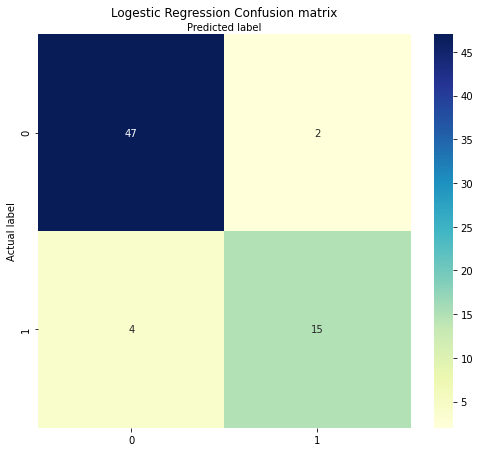

Logestic Regression sensitivity = [0.         0.78947368 1.        ]and Logestic Regression specificity = [0.         0.04081633 1.        ]


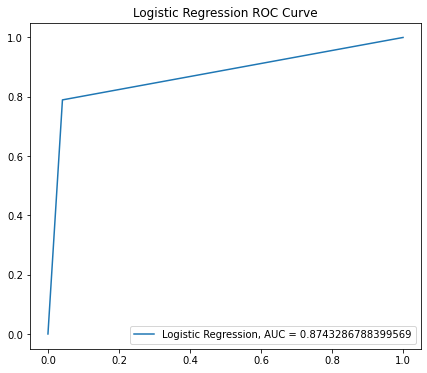

In [37]:
loo = LeaveOneOut()
loo.get_n_splits(X_transformed)
loologreg = LogisticRegression()
predicts=[]

for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Logistic Regression Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting
# import required modules


#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logestic Regression Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Logestic Regression sensitivity = "+str(tpr)+"and Logestic Regression specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))
plt.title("Logistic Regression ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Logistic Regression')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[44  5]
 [ 2 17]]
Gaussian Naive Bayes Accuracy by LOOCV 0.8970588235294118


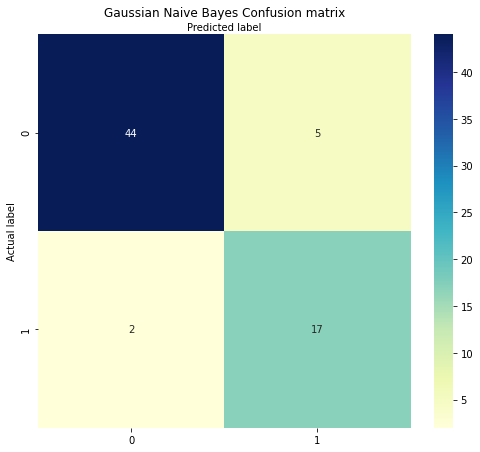

Gaussian Naive Bayes sensitivity = [0.         0.89473684 1.        ]and Gaussian Naive Bayes specificity = [0.         0.10204082 1.        ]


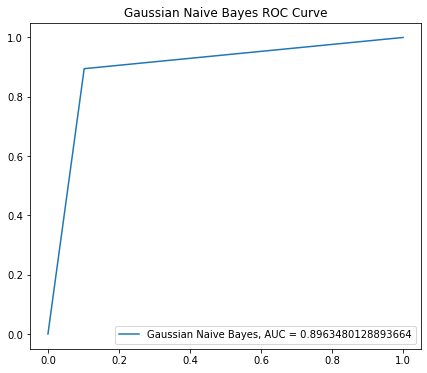

In [38]:

####GaussianNB

loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = GaussianNB()
predicts=[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologreg.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Gaussian Naive Bayes Accuracy by LOOCV", acc)
######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Gaussian Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("Gaussian Naive Bayes sensitivity = "+str(tpr)+"and Gaussian Naive Bayes specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, AUC = "+str(auc))
plt.title("Gaussian Naive Bayes ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Gaussian Naive Bayes')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[49  0]
 [ 0 19]]
Support Vector Machine Accuracy by LOOCV 1.0


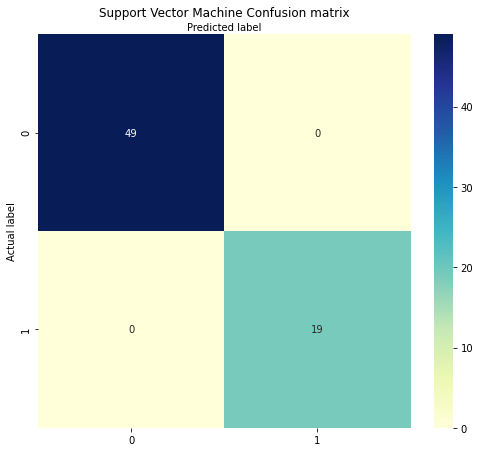

SVM sensitivity = [0. 1. 1.]and SVM specificity = [0. 0. 1.]


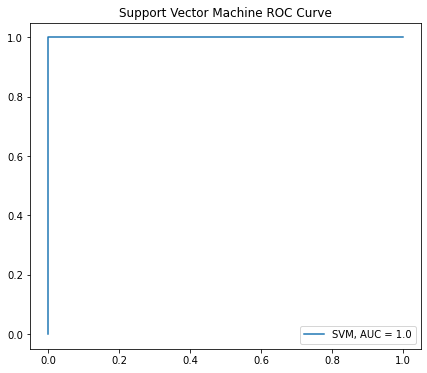

In [15]:

###SVM
loo = LeaveOneOut()
loo.get_n_splits(X)
loologreg = svmachine = svm.SVC(gamma='auto',kernel='rbf',degree=3)

predicts=[]
for train_index, test_index in loo.split(X_transformed):
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    loologregModel =loologreg.fit(X_train, y_train)
    predicts.append(loologregModel.predict(X_test))

predict = np.array(predicts)
cnf_matrix = metrics.confusion_matrix(y, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y, predict)
print("Support Vector Machine Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve

fpr, tpr, _ = metrics.roc_curve(y,  predict)
auc = metrics.roc_auc_score(y, predict)
print("SVM sensitivity = "+str(tpr)+"and SVM specificity = "+str(fpr))
plt.plot(fpr,tpr,label="SVM, AUC = "+str(auc))
plt.title("Support Vector Machine ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Support Vector Machine')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

In [16]:
result = []
result = pd.DataFrame(result)
result['method'],result['accuracy'],result['sensitivity'],result['specificity']=methodList,accList,sensitivityList,specificityList
result.to_csv('eye-tracking and others(3 vs 1).csv',index=False)